### Proyecto No.1
- Diego Cordóva 20312
- Paola De León 20361
- Gabriela Contreras 20213

In [74]:
import skimage
import numpy as np 
from skimage import io, morphology, color
import matplotlib.pyplot as plt

##### PARTE NO. 1
------

##### PARTE NO. 2
------

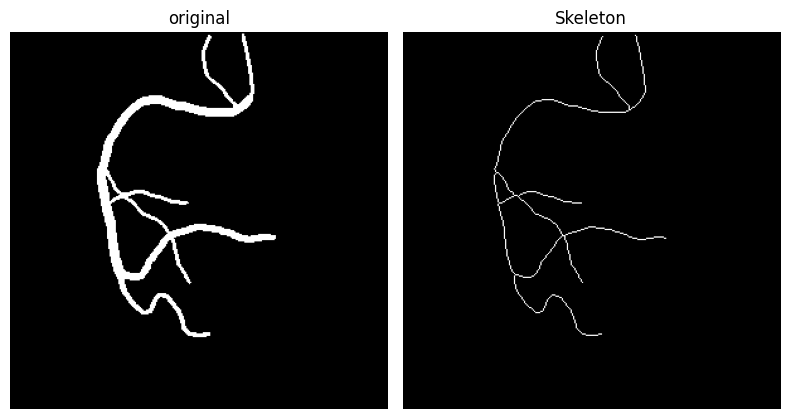

In [75]:
from skimage import morphology as mo
from skimage.morphology import medial_axis, skeletonize

def read_img(filepath):
    data = open(filepath, 'rb')
    img = plt.imread(data)
    return img

def create_skeleton(img):
    T = mo.thin(img)
    skeleton_lee = skeletonize(T, method='lee')
    return skeleton_lee

# ejemplo de uso
img = read_img('./database/1_gt.pgm')
skel = create_skeleton(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skel, cmap='gray')
ax[1].set_title('Skeleton')
ax[1].axis('off')

fig.tight_layout()
plt.show()

**Nodos Intermedios**

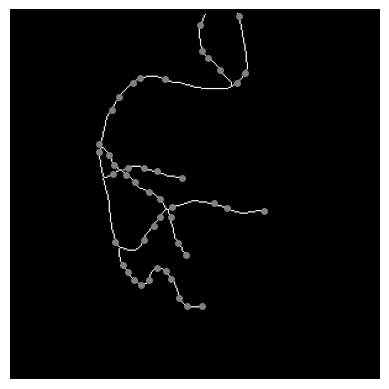

In [76]:
from skimage.feature import corner_peaks, corner_fast, corner_harris

def draw_with_coords(og_img, coords: list[dict[list, str]]):
    fig, ax = plt.subplots()
    ax.imshow(og_img, cmap=plt.cm.gray)

    for cor in coords:
        actual_coords = cor['coords']
        actual_color = cor['color']
        ax.plot(actual_coords[:, 1], actual_coords[:, 0], color=actual_color, marker='o', linestyle='None', markersize=4)

    ax.axis('off')
    plt.show()

def get_nodes(image):
    corner_image = corner_fast(image)
    coords = corner_peaks(corner_image, min_distance=5, threshold_rel=0.3)
    return coords, corner_image

node_coords, corner_img = get_nodes(skel)
draw_with_coords(skel, [{'coords': node_coords, 'color': 'gray'}])

**Bifurcaciones**

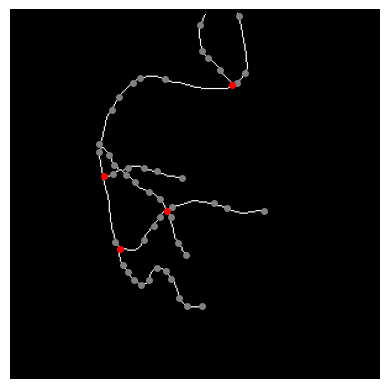

In [77]:
from skimage.feature import corner_peaks, corner_harris


def get_difurcations(image):
    corner_image = corner_harris(image)
    coords = corner_peaks(corner_image, min_distance=15, threshold_rel=0.5)
    return coords, corner_image

coords_difurcations, corner_img = get_difurcations(skel)

draw_with_coords(skel, [
    {'coords': node_coords, 'color': 'gray'},
    {'coords': coords_difurcations, 'color': 'red'},
])


In [78]:
from math import sqrt
from skimage.feature import corner_foerstner


def get_extremes(image):
    corner_image = corner_foerstner(image)
    coords = corner_peaks(corner_image, min_distance=15, threshold_rel=0.04)
        
    return coords, corner_image

extremes, corner_img = get_extremes(skel)

draw_with_coords(skel, [
    {'coords': node_coords, 'color': 'gray'},
    {'coords': coords_difurcations, 'color': 'red'},
    {'coords': extremes, 'color': 'green'},
])

AttributeError: 'tuple' object has no attribute 'ndim'